PASO 8B: ELIMINACIÓN FINAL DE MULTICOLINEALIDAD

📂 1. Cargando dataset transformado...

✅ Dataset original: 538 filas × 42 columnas

🔧 2. CREANDO VARIABLE: Num_Foliculos_Max

📋 Justificación:
   - Criterio Rotterdam: ≥12 folículos POR OVARIO (no suma)
   - MAX representa ovario más afectado
   - Elimina VIF=10.6 de variables individuales
   - Mantiene información diagnóstica

✅ Variable creada: Num_Foliculos_Max

📊 Estadísticas de la nueva variable:
   Media: 7.43
   Mediana: 7.00
   Min: 1.00
   Max: 22.00

📊 Comparación SOP vs No-SOP:
   Media SOP: 11.80 folículos
   Media No-SOP: 5.30 folículos
   Diferencia: 6.50 folículos

🗑️ 3. DEFINIENDO VARIABLES A ELIMINAR

📋 VARIABLES A ELIMINAR:

GRUPO 1: Variables Derivadas (6)
   1. Peso (Kg)
   2. Altura (cm)
   3. Cintura (pulg)
   4. Cadera (pulg)
   5. Ratio FSH/LH
   6. FSH (mUI/mL)

GRUPO 2: VIF Alto + Baja Importancia (10)
   1. Glucosa (mg/dl)
   2. Frecuencia Respiratoria (rpm)
   3. Hemoglobina (g/dl)
   4. Grupo Sanguíneo
   5. 

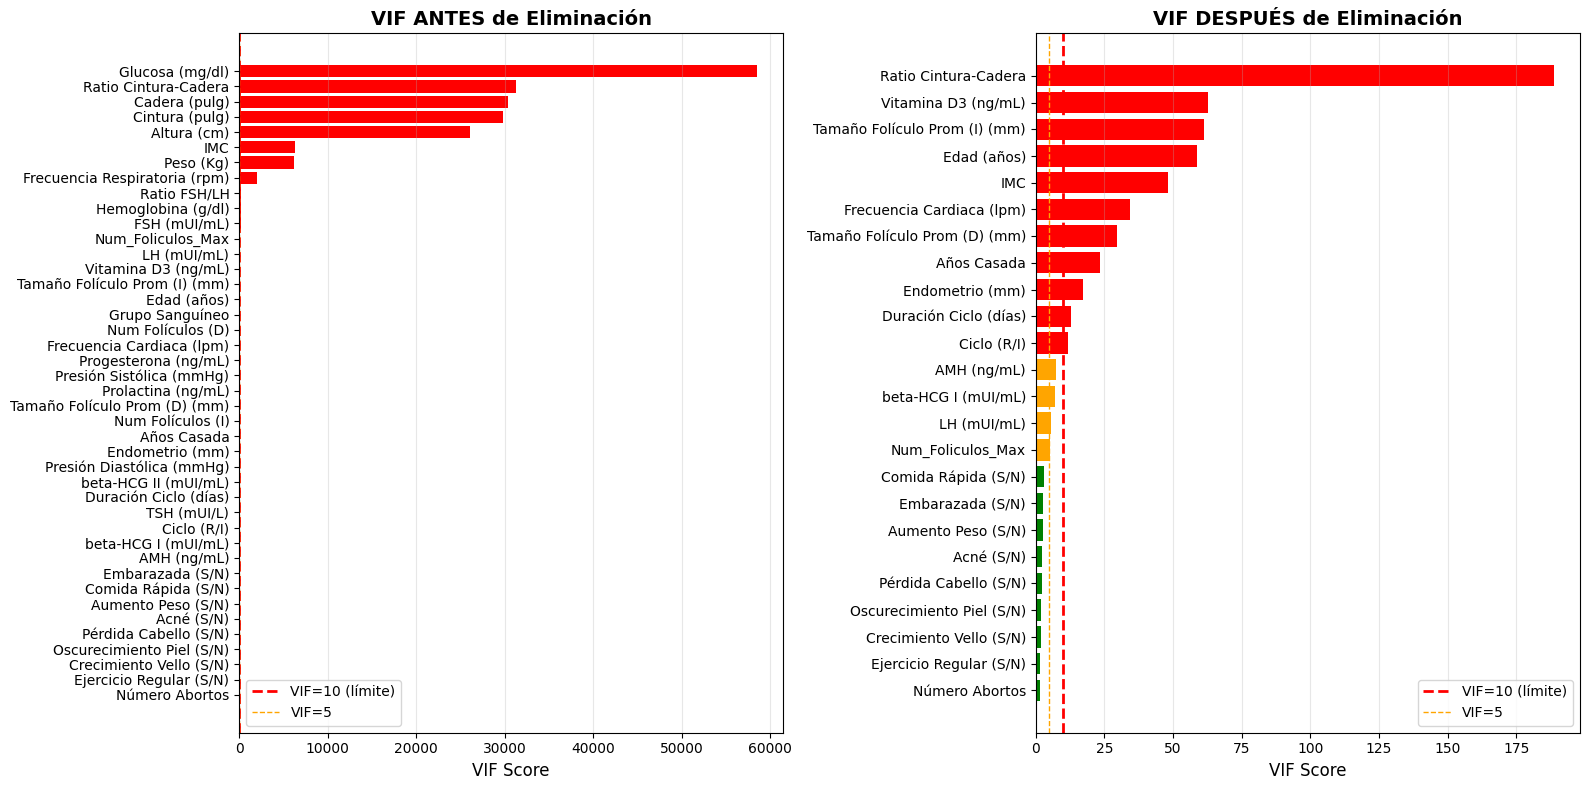

In [2]:
"""
PASO 8B: ELIMINACIÓN DE MULTICOLINEALIDAD - DECISIÓN FINAL

Proyecto: Análisis y Predicción de SOP
Fecha: 1 noviembre 2025
Objetivo: Eliminar variables redundantes y crear variable Num_Foliculos_Max

DECISIONES BASADAS EN:
- Análisis 8A (Feature Importance, VIF, Significancia)
- Criterio clínico de QFB
- Relaciones matemáticas obvias (IMC=Peso/Altura², etc.)
"""

import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

print("="*80)
print("PASO 8B: ELIMINACIÓN FINAL DE MULTICOLINEALIDAD")
print("="*80)
print()

# =============================================================================
# 1. CARGAR DATASET TRANSFORMADO
# =============================================================================

print("📂 1. Cargando dataset transformado...")
print()

# AJUSTA LA RUTA
df = pd.read_csv('../documentos_generados/PCOS_data_transformado.csv')

print(f"✅ Dataset original: {df.shape[0]} filas × {df.shape[1]} columnas")
print()

# Variable objetivo
target_col = 'SOP (S/N)'  # AJUSTA si es diferente

# Backup del dataset original
df_original = df.copy()

# =============================================================================
# 2. CREAR VARIABLE NUM_FOLICULOS_MAX
# =============================================================================

print("="*80)
print("🔧 2. CREANDO VARIABLE: Num_Foliculos_Max")
print("="*80)
print()

print("📋 Justificación:")
print("   - Criterio Rotterdam: ≥12 folículos POR OVARIO (no suma)")
print("   - MAX representa ovario más afectado")
print("   - Elimina VIF=10.6 de variables individuales")
print("   - Mantiene información diagnóstica")
print()

# Crear variable MAX
df['Num_Foliculos_Max'] = df[['Num Folículos (D)', 'Num Folículos (I)']].max(axis=1)

print(f"✅ Variable creada: Num_Foliculos_Max")
print()
print("📊 Estadísticas de la nueva variable:")
print(f"   Media: {df['Num_Foliculos_Max'].mean():.2f}")
print(f"   Mediana: {df['Num_Foliculos_Max'].median():.2f}")
print(f"   Min: {df['Num_Foliculos_Max'].min():.2f}")
print(f"   Max: {df['Num_Foliculos_Max'].max():.2f}")
print()

# Comparar con originales
print("📊 Comparación SOP vs No-SOP:")
sop_max = df[df[target_col]==1]['Num_Foliculos_Max'].mean()
no_sop_max = df[df[target_col]==0]['Num_Foliculos_Max'].mean()

print(f"   Media SOP: {sop_max:.2f} folículos")
print(f"   Media No-SOP: {no_sop_max:.2f} folículos")
print(f"   Diferencia: {sop_max - no_sop_max:.2f} folículos")
print()

# =============================================================================
# 3. DEFINIR VARIABLES A ELIMINAR
# =============================================================================

print("="*80)
print("🗑️ 3. DEFINIENDO VARIABLES A ELIMINAR")
print("="*80)
print()

# GRUPO 1: Variables derivadas (obvias matemáticamente)
vars_derivadas = [
    'Peso (Kg)',           # IMC = Peso / Altura²
    'Altura (cm)',         # IMC = Peso / Altura²
    'Cintura (pulg)',      # Ratio C/C = Cintura / Cadera
    'Cadera (pulg)',       # Ratio C/C = Cintura / Cadera
    'Ratio FSH/LH',        # FSH/LH (FSH inconsistente + LH más importante)
    'FSH (mUI/mL)',        # Inconsistente según Paso 7, LH más relevante
]

# GRUPO 2: VIF extremo + baja importancia + no significativas
vars_vif_alto = [
    'Glucosa (mg/dl)',              # VIF=58,321 (absurdo) + p=0.34
    'Frecuencia Respiratoria (rpm)', # VIF=1,976 + p=0.28
    'Hemoglobina (g/dl)',           # VIF=185 + p=0.02 (límite)
    'Grupo Sanguíneo',              # VIF=63 + p=0.39
    'Progesterona (ng/mL)',         # VIF=39 + p=0.45
    'Presión Sistólica (mmHg)',     # VIF=37 + p=0.99
    'Prolactina (ng/mL)',           # VIF=34 + p=0.61
    'Presión Diastólica (mmHg)',    # VIF=18 + p=0.47
    'beta-HCG II (mUI/mL)',         # VIF=17 + p=0.75
    'TSH (mUI/L)',                  # VIF=13 + p=0.70
]

# GRUPO 3: Folículos individuales (reemplazados por MAX)
vars_foliculos = [
    'Num Folículos (D)',
    'Num Folículos (I)',
]

# Combinar todas las variables a eliminar
vars_eliminar = vars_derivadas + vars_vif_alto + vars_foliculos

print("📋 VARIABLES A ELIMINAR:")
print()
print(f"GRUPO 1: Variables Derivadas ({len(vars_derivadas)})")
for i, var in enumerate(vars_derivadas, 1):
    print(f"   {i}. {var}")
print()

print(f"GRUPO 2: VIF Alto + Baja Importancia ({len(vars_vif_alto)})")
for i, var in enumerate(vars_vif_alto, 1):
    print(f"   {i}. {var}")
print()

print(f"GRUPO 3: Folículos Individuales ({len(vars_foliculos)})")
for i, var in enumerate(vars_foliculos, 1):
    print(f"   {i}. {var}")
print()

print(f"📊 TOTAL A ELIMINAR: {len(vars_eliminar)} variables")
print()

# Verificar que todas existen
vars_no_encontradas = [v for v in vars_eliminar if v not in df.columns]
if vars_no_encontradas:
    print("⚠️ ADVERTENCIA: Variables no encontradas en el dataset:")
    for var in vars_no_encontradas:
        print(f"   - {var}")
    print()
    # Eliminar de la lista
    vars_eliminar = [v for v in vars_eliminar if v in df.columns]
    print(f"📊 Variables a eliminar (actualizadas): {len(vars_eliminar)}")
    print()

# =============================================================================
# 4. CALCULAR VIF ANTES DE ELIMINAR
# =============================================================================

print("="*80)
print("📊 4. CALCULANDO VIF ANTES DE ELIMINACIÓN")
print("="*80)
print()

# Seleccionar solo variables numéricas (excluyendo target)
X_antes = df.drop(target_col, axis=1).select_dtypes(include=[np.number])

print(f"Variables numéricas antes: {len(X_antes.columns)}")
print()
print("🔍 Calculando VIF... (puede tardar ~30 segundos)")
print()

vif_antes = []
for i, col in enumerate(X_antes.columns):
    vif = variance_inflation_factor(X_antes.values, i)
    vif_antes.append({
        'Variable': col,
        'VIF_Antes': vif,
        'Clasificacion_Antes': 'SEVERO (>10)' if vif > 10 else ('MODERADO (5-10)' if vif > 5 else 'OK (<5)')
    })

vif_antes_df = pd.DataFrame(vif_antes)
vif_antes_df = vif_antes_df.sort_values('VIF_Antes', ascending=False)

print("✅ VIF calculado")
print()
print("📊 TOP 20 Variables con mayor VIF (ANTES):")
print(vif_antes_df.head(20)[['Variable', 'VIF_Antes', 'Clasificacion_Antes']].to_string(index=False))
print()

# Resumen ANTES
vif_severo_antes = (vif_antes_df['VIF_Antes'] > 10).sum()
vif_moderado_antes = ((vif_antes_df['VIF_Antes'] > 5) & (vif_antes_df['VIF_Antes'] <= 10)).sum()
vif_ok_antes = (vif_antes_df['VIF_Antes'] <= 5).sum()

print("📊 RESUMEN VIF ANTES:")
print(f"   🔴 SEVERO (>10):     {vif_severo_antes} variables ({vif_severo_antes/len(vif_antes_df)*100:.1f}%)")
print(f"   🟡 MODERADO (5-10):  {vif_moderado_antes} variables ({vif_moderado_antes/len(vif_antes_df)*100:.1f}%)")
print(f"   🟢 OK (<5):          {vif_ok_antes} variables ({vif_ok_antes/len(vif_antes_df)*100:.1f}%)")
print()

# =============================================================================
# 5. ELIMINAR VARIABLES
# =============================================================================

print("="*80)
print("🗑️ 5. ELIMINANDO VARIABLES")
print("="*80)
print()

print(f"Eliminando {len(vars_eliminar)} variables...")
print()

# Eliminar
df_limpio = df.drop(columns=vars_eliminar, errors='ignore')

print(f"✅ Variables eliminadas")
print()
print(f"📊 Dataset ANTES:  {df.shape[0]} filas × {df.shape[1]} columnas")
print(f"📊 Dataset DESPUÉS: {df_limpio.shape[0]} filas × {df_limpio.shape[1]} columnas")
print(f"📊 Columnas eliminadas: {df.shape[1] - df_limpio.shape[1]}")
print()

# =============================================================================
# 6. CALCULAR VIF DESPUÉS DE ELIMINAR
# =============================================================================

print("="*80)
print("📊 6. CALCULANDO VIF DESPUÉS DE ELIMINACIÓN")
print("="*80)
print()

# Seleccionar solo variables numéricas (excluyendo target)
X_despues = df_limpio.drop(target_col, axis=1).select_dtypes(include=[np.number])

print(f"Variables numéricas después: {len(X_despues.columns)}")
print()
print("🔍 Calculando VIF... (puede tardar ~20 segundos)")
print()

vif_despues = []
for i, col in enumerate(X_despues.columns):
    vif = variance_inflation_factor(X_despues.values, i)
    vif_despues.append({
        'Variable': col,
        'VIF_Despues': vif,
        'Clasificacion_Despues': 'SEVERO (>10)' if vif > 10 else ('MODERADO (5-10)' if vif > 5 else 'OK (<5)')
    })

vif_despues_df = pd.DataFrame(vif_despues)
vif_despues_df = vif_despues_df.sort_values('VIF_Despues', ascending=False)

print("✅ VIF calculado")
print()
print("📊 TODAS LAS VARIABLES (ordenadas por VIF DESPUÉS):")
print(vif_despues_df[['Variable', 'VIF_Despues', 'Clasificacion_Despues']].to_string(index=False))
print()

# Resumen DESPUÉS
vif_severo_despues = (vif_despues_df['VIF_Despues'] > 10).sum()
vif_moderado_despues = ((vif_despues_df['VIF_Despues'] > 5) & (vif_despues_df['VIF_Despues'] <= 10)).sum()
vif_ok_despues = (vif_despues_df['VIF_Despues'] <= 5).sum()

print("📊 RESUMEN VIF DESPUÉS:")
print(f"   🔴 SEVERO (>10):     {vif_severo_despues} variables ({vif_severo_despues/len(vif_despues_df)*100:.1f}%)")
print(f"   🟡 MODERADO (5-10):  {vif_moderado_despues} variables ({vif_moderado_despues/len(vif_despues_df)*100:.1f}%)")
print(f"   🟢 OK (<5):          {vif_ok_despues} variables ({vif_ok_despues/len(vif_despues_df)*100:.1f}%)")
print()

# =============================================================================
# 7. COMPARACIÓN ANTES VS DESPUÉS
# =============================================================================

print("="*80)
print("📊 7. COMPARACIÓN ANTES VS DESPUÉS")
print("="*80)
print()

# Merge para comparar
comparacion = vif_antes_df.merge(
    vif_despues_df,
    on='Variable',
    how='outer'
)

# Calcular cambio
comparacion['Cambio_VIF'] = comparacion['VIF_Despues'] - comparacion['VIF_Antes']
comparacion['Cambio_Porcentual'] = (
    (comparacion['VIF_Despues'] - comparacion['VIF_Antes']) / comparacion['VIF_Antes'] * 100
)

# Variables que estaban y siguen
vars_permanecen = comparacion[comparacion['VIF_Despues'].notna()].copy()
vars_permanecen = vars_permanecen.sort_values('VIF_Despues', ascending=False)

print("📊 VARIABLES QUE PERMANECEN (ordenadas por VIF final):")
print()
print(vars_permanecen[['Variable', 'VIF_Antes', 'VIF_Despues', 'Cambio_VIF']].to_string(index=False))
print()

# Guardar comparación completa
comparacion.to_csv('comparacion_vif_antes_despues_COMPLETA.csv', index=False)
print("📁 Guardado: comparacion_vif_antes_despues_COMPLETA.csv")
print()

# Guardar solo variables eliminadas
vars_eliminadas_info = comparacion[comparacion['VIF_Despues'].isna()].copy()
vars_eliminadas_info = vars_eliminadas_info[['Variable', 'VIF_Antes', 'Clasificacion_Antes']]
vars_eliminadas_info = vars_eliminadas_info.sort_values('VIF_Antes', ascending=False)
vars_eliminadas_info.to_csv('variables_eliminadas_paso8b.csv', index=False)
print("📁 Guardado: variables_eliminadas_paso8b.csv")
print()

# =============================================================================
# 8. VERIFICACIÓN DE ÉXITO
# =============================================================================

print("="*80)
print("✅ 8. VERIFICACIÓN DE ÉXITO")
print("="*80)
print()

# Objetivo: VIF < 10 en todas
vif_maximo = vif_despues_df['VIF_Despues'].max()
vars_problematicas = vif_despues_df[vif_despues_df['VIF_Despues'] > 10]

print("🎯 OBJETIVO: VIF < 10 en todas las variables")
print()
print(f"📊 VIF máximo actual: {vif_maximo:.2f}")
print()

if len(vars_problematicas) == 0:
    print("✅ ¡ÉXITO! Todas las variables tienen VIF < 10")
    print()
else:
    print(f"⚠️ ATENCIÓN: {len(vars_problematicas)} variables aún tienen VIF > 10:")
    print()
    print(vars_problematicas[['Variable', 'VIF_Despues']].to_string(index=False))
    print()
    print("💡 RECOMENDACIÓN: Considerar eliminar estas variables también")
    print()

# Resumen de mejora
print("📊 MEJORA LOGRADA:")
print(f"   Variables ANTES:        {len(X_antes.columns)}")
print(f"   Variables DESPUÉS:      {len(X_despues.columns)}")
print(f"   Variables eliminadas:   {len(X_antes.columns) - len(X_despues.columns)}")
print()
print(f"   VIF SEVERO ANTES:       {vif_severo_antes} ({vif_severo_antes/len(vif_antes_df)*100:.1f}%)")
print(f"   VIF SEVERO DESPUÉS:     {vif_severo_despues} ({vif_severo_despues/len(vif_despues_df)*100:.1f}%)")
print(f"   Reducción:              {vif_severo_antes - vif_severo_despues} variables")
print()

# =============================================================================
# 9. VISUALIZACIÓN
# =============================================================================

print("="*80)
print("📊 9. GENERANDO VISUALIZACIONES")
print("="*80)
print()

# Gráfico de barras comparativo
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# ANTES
ax1 = axes[0]
vif_plot_antes = vif_antes_df.sort_values('VIF_Antes', ascending=True)
colors_antes = vif_plot_antes['VIF_Antes'].apply(
    lambda x: 'red' if x > 10 else ('orange' if x > 5 else 'green')
)
ax1.barh(vif_plot_antes['Variable'], vif_plot_antes['VIF_Antes'], color=colors_antes)
ax1.axvline(x=10, color='red', linestyle='--', linewidth=2, label='VIF=10 (límite)')
ax1.axvline(x=5, color='orange', linestyle='--', linewidth=1, label='VIF=5')
ax1.set_xlabel('VIF Score', fontsize=12)
ax1.set_title('VIF ANTES de Eliminación', fontsize=14, fontweight='bold')
ax1.legend()
ax1.grid(axis='x', alpha=0.3)

# DESPUÉS
ax2 = axes[1]
vif_plot_despues = vif_despues_df.sort_values('VIF_Despues', ascending=True)
colors_despues = vif_plot_despues['VIF_Despues'].apply(
    lambda x: 'red' if x > 10 else ('orange' if x > 5 else 'green')
)
ax2.barh(vif_plot_despues['Variable'], vif_plot_despues['VIF_Despues'], color=colors_despues)
ax2.axvline(x=10, color='red', linestyle='--', linewidth=2, label='VIF=10 (límite)')
ax2.axvline(x=5, color='orange', linestyle='--', linewidth=1, label='VIF=5')
ax2.set_xlabel('VIF Score', fontsize=12)
ax2.set_title('VIF DESPUÉS de Eliminación', fontsize=14, fontweight='bold')
ax2.legend()
ax2.grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.savefig('comparacion_vif_antes_despues.png', dpi=300, bbox_inches='tight')
print("✅ Gráfico guardado: comparacion_vif_antes_despues.png")
print()

# =============================================================================
# 10. GUARDAR DATASET LIMPIO
# =============================================================================

print("="*80)
print("💾 10. GUARDANDO DATASET LIMPIO")
print("="*80)
print()

# Guardar CSV
df_limpio.to_csv('PCOS_data_sin_multicolinealidad.csv', index=False)
print(f"✅ Dataset guardado: PCOS_data_sin_multicolinealidad.csv")
print(f"   {df_limpio.shape[0]} filas × {df_limpio.shape[1]} columnas")
print()

# Guardar Excel también
df_limpio.to_excel('PCOS_data_sin_multicolinealidad.xlsx', index=False)
print(f"✅ Dataset guardado: PCOS_data_sin_multicolinealidad.xlsx")
print()

# Guardar VIF final
vif_despues_df.to_csv('vif_final_sin_multicolinealidad.csv', index=False)
print("✅ VIF final guardado: vif_final_sin_multicolinealidad.csv")
print()

# =============================================================================
# 11. RESUMEN EJECUTIVO
# =============================================================================

print("="*80)
print("📋 11. RESUMEN EJECUTIVO")
print("="*80)
print()

print("🎯 OBJETIVO CUMPLIDO:")
if vif_maximo < 10:
    print("   ✅ Todas las variables tienen VIF < 10")
elif vif_maximo < 15:
    print("   ⚠️ VIF máximo < 15 (aceptable, pero revisa variables >10)")
else:
    print("   ❌ VIF máximo > 15 (necesita más eliminaciones)")
print()

print("📊 ESTADÍSTICAS FINALES:")
print(f"   Filas originales:              {df_original.shape[0]}")
print(f"   Filas finales:                 {df_limpio.shape[0]}")
print(f"   Pérdida de filas:              0 (0%)")
print()
print(f"   Columnas originales:           {df_original.shape[1]}")
print(f"   Columnas finales:              {df_limpio.shape[1]}")
print(f"   Columnas eliminadas:           {df_original.shape[1] - df_limpio.shape[1]}")
print(f"   Columnas nuevas:               1 (Num_Foliculos_Max)")
print()
print(f"   Variables numéricas ANTES:     {len(X_antes.columns)}")
print(f"   Variables numéricas DESPUÉS:   {len(X_despues.columns)}")
print()

print("📁 ARCHIVOS GENERADOS:")
print("   1. PCOS_data_sin_multicolinealidad.csv          ← DATASET PRINCIPAL")
print("   2. PCOS_data_sin_multicolinealidad.xlsx")
print("   3. vif_final_sin_multicolinealidad.csv")
print("   4. comparacion_vif_antes_despues_COMPLETA.csv")
print("   5. variables_eliminadas_paso8b.csv")
print("   6. comparacion_vif_antes_despues.png")
print()

print("🎯 SIGUIENTE PASO:")
print("   Este dataset está listo para:")
print("   - Regresión Logística (VIF resuelto)")
print("   - Feature Engineering adicional (Paso 9)")
print("   - Train/Test split (Paso 10)")
print()

print("💡 NOTA IMPORTANTE:")
print("   Para Random Forest/XGBoost/KNN:")
print("   - Pueden usar dataset TRANSFORMADO original")
print("   - O este dataset sin multicolinealidad")
print("   - Ambos funcionan (VIF no importa para árboles)")
print()

print("="*80)
print("✅ PASO 8B COMPLETADO")
print("="*80)

PASO 8C: ELIMINACIÓN DE MULTICOLINEALIDAD - RONDA 2

📂 1. Cargando dataset de Paso 8B...

✅ Dataset cargado: 538 filas × 25 columnas

🗑️ 2. VARIABLES A ELIMINAR - RONDA 2

📋 VARIABLES A ELIMINAR EN RONDA 2:

   1. Ratio Cintura-Cadera
   2. Vitamina D3 (ng/mL)
   3. Tamaño Folículo Prom (I) (mm)
   4. Tamaño Folículo Prom (D) (mm)
   5. Frecuencia Cardiaca (lpm)
   6. Años Casada

📊 TOTAL A ELIMINAR: 6 variables

📋 JUSTIFICACIÓN DE CADA ELIMINACIÓN:

• Ratio Cintura-Cadera
  → VIF=188, p=0.67 (NO significativo), IMC es mejor indicador

• Vitamina D3 (ng/mL)
  → VIF=62, p=0.19 (NO significativo), baja importancia (0.016)

• Tamaño Folículo Prom (I) (mm)
  → VIF=61, redundante con Num_Foliculos_Max

• Tamaño Folículo Prom (D) (mm)
  → VIF=29, redundante con Num_Foliculos_Max

• Frecuencia Cardiaca (lpm)
  → VIF=34, no relevante clínicamente para SOP

• Años Casada
  → VIF=23, correlaciona con Edad (r=0.61), mantener Edad

📊 3. VIF ANTES DE RONDA 2

Variables numéricas antes de Ronda 2: 2

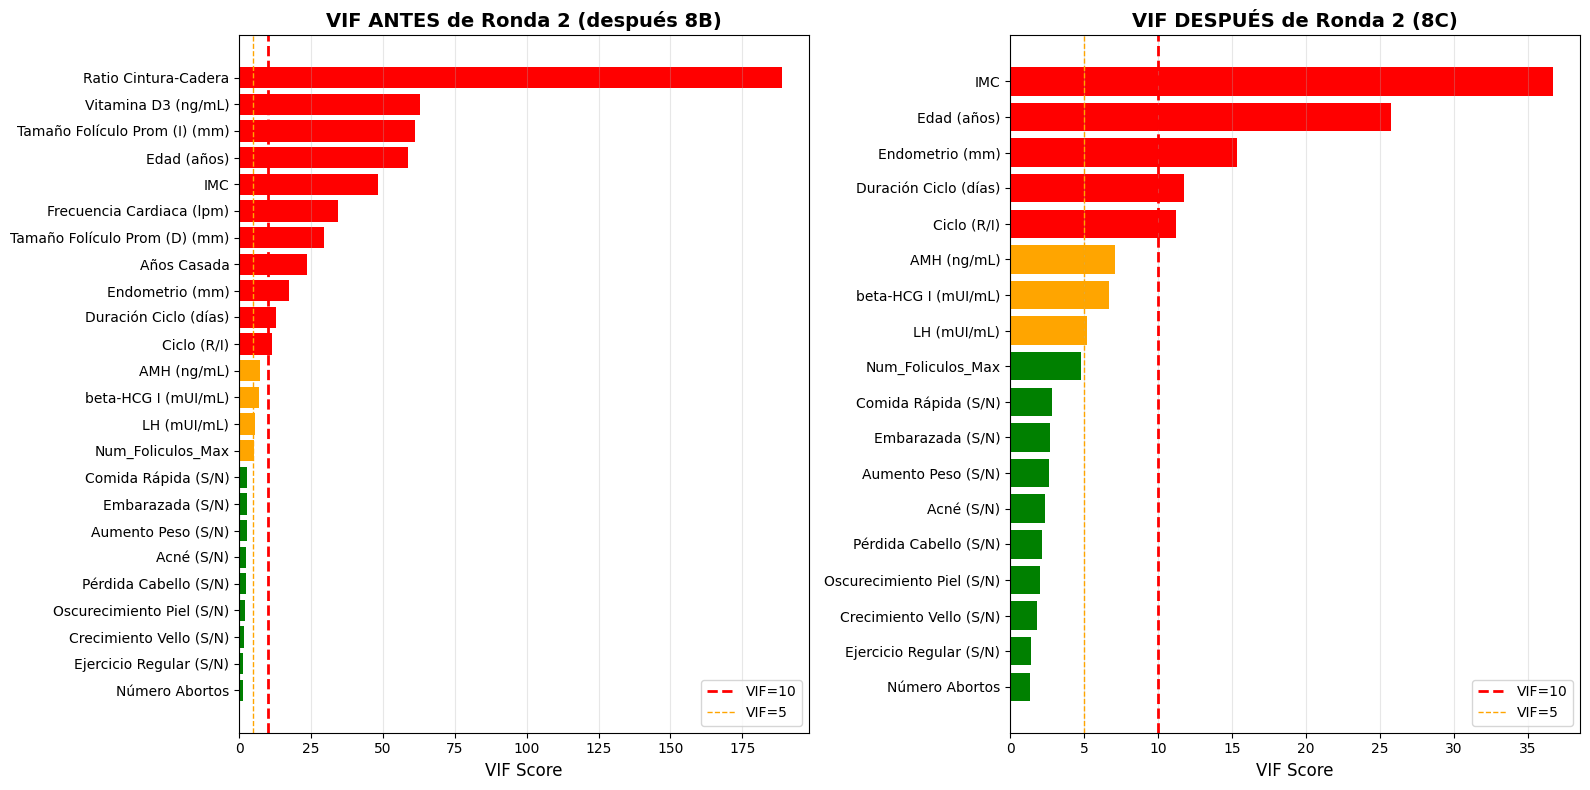

In [3]:
"""
PASO 8C: ELIMINACIÓN DE MULTICOLINEALIDAD - RONDA 2

Proyecto: Análisis y Predicción de SOP
Fecha: 1 noviembre 2025
Objetivo: Eliminar 6 variables adicionales para reducir VIF < 10

DECISIONES BASADAS EN:
- Resultados de 8B (VIF todavía alto en 11 variables)
- Análisis de significancia y feature importance
- Criterio clínico de QFB
- DECISIÓN: Mantener IMC (aunque VIF=48)
"""

import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

print("="*80)
print("PASO 8C: ELIMINACIÓN DE MULTICOLINEALIDAD - RONDA 2")
print("="*80)
print()

# =============================================================================
# 1. CARGAR DATASET DE 8B
# =============================================================================

print("📂 1. Cargando dataset de Paso 8B...")
print()

# AJUSTA LA RUTA
df = pd.read_csv('PCOS_data_sin_multicolinealidad.csv')

print(f"✅ Dataset cargado: {df.shape[0]} filas × {df.shape[1]} columnas")
print()

# Variable objetivo
target_col = 'SOP (S/N)'  # AJUSTA si es diferente

# Backup
df_antes_ronda2 = df.copy()

# =============================================================================
# 2. DEFINIR VARIABLES A ELIMINAR (RONDA 2)
# =============================================================================

print("="*80)
print("🗑️ 2. VARIABLES A ELIMINAR - RONDA 2")
print("="*80)
print()

# Variables identificadas en análisis
vars_ronda2 = [
    'Ratio Cintura-Cadera',        # VIF=188, p=0.67 (NO significativo)
    'Vitamina D3 (ng/mL)',         # VIF=62, p=0.19 (NO significativo)
    'Tamaño Folículo Prom (I) (mm)', # VIF=61, redundante con Num_Foliculos_Max
    'Tamaño Folículo Prom (D) (mm)', # VIF=29, redundante con Num_Foliculos_Max
    'Frecuencia Cardiaca (lpm)',   # VIF=34, no relevante para SOP
    'Años Casada',                 # VIF=23, mantener Edad en su lugar
]

print("📋 VARIABLES A ELIMINAR EN RONDA 2:")
print()
for i, var in enumerate(vars_ronda2, 1):
    print(f"   {i}. {var}")
print()

print(f"📊 TOTAL A ELIMINAR: {len(vars_ronda2)} variables")
print()

# Verificar que existen
vars_no_encontradas = [v for v in vars_ronda2 if v not in df.columns]
if vars_no_encontradas:
    print("⚠️ ADVERTENCIA: Variables no encontradas en el dataset:")
    for var in vars_no_encontradas:
        print(f"   - {var}")
    print()
    # Filtrar solo las que existen
    vars_ronda2 = [v for v in vars_ronda2 if v in df.columns]
    print(f"📊 Variables a eliminar (actualizadas): {len(vars_ronda2)}")
    print()

# Mostrar justificación
print("📋 JUSTIFICACIÓN DE CADA ELIMINACIÓN:")
print()

justificaciones = {
    'Ratio Cintura-Cadera': 'VIF=188, p=0.67 (NO significativo), IMC es mejor indicador',
    'Vitamina D3 (ng/mL)': 'VIF=62, p=0.19 (NO significativo), baja importancia (0.016)',
    'Tamaño Folículo Prom (I) (mm)': 'VIF=61, redundante con Num_Foliculos_Max',
    'Tamaño Folículo Prom (D) (mm)': 'VIF=29, redundante con Num_Foliculos_Max',
    'Frecuencia Cardiaca (lpm)': 'VIF=34, no relevante clínicamente para SOP',
    'Años Casada': 'VIF=23, correlaciona con Edad (r=0.61), mantener Edad'
}

for var in vars_ronda2:
    if var in justificaciones:
        print(f"• {var}")
        print(f"  → {justificaciones[var]}")
        print()

# =============================================================================
# 3. CALCULAR VIF ANTES (RONDA 2)
# =============================================================================

print("="*80)
print("📊 3. VIF ANTES DE RONDA 2")
print("="*80)
print()

# Solo variables numéricas
X_antes = df.drop(target_col, axis=1).select_dtypes(include=[np.number])

print(f"Variables numéricas antes de Ronda 2: {len(X_antes.columns)}")
print()
print("🔍 Calculando VIF... (puede tardar ~20 segundos)")
print()

vif_antes_ronda2 = []
for i, col in enumerate(X_antes.columns):
    vif = variance_inflation_factor(X_antes.values, i)
    vif_antes_ronda2.append({
        'Variable': col,
        'VIF_Antes_R2': vif
    })

vif_antes_df = pd.DataFrame(vif_antes_ronda2)
vif_antes_df = vif_antes_df.sort_values('VIF_Antes_R2', ascending=False)

print("✅ VIF calculado")
print()
print("📊 Variables con VIF > 10 (ANTES de Ronda 2):")
print()
vars_problematicas_antes = vif_antes_df[vif_antes_df['VIF_Antes_R2'] > 10]
print(vars_problematicas_antes[['Variable', 'VIF_Antes_R2']].to_string(index=False))
print()
print(f"Total variables VIF>10: {len(vars_problematicas_antes)}")
print()

# =============================================================================
# 4. ELIMINAR VARIABLES
# =============================================================================

print("="*80)
print("🗑️ 4. ELIMINANDO VARIABLES - RONDA 2")
print("="*80)
print()

print(f"Eliminando {len(vars_ronda2)} variables...")
print()

# Eliminar
df_limpio_final = df.drop(columns=vars_ronda2, errors='ignore')

print(f"✅ Variables eliminadas")
print()
print(f"📊 Dataset ANTES Ronda 2:  {df.shape[0]} filas × {df.shape[1]} columnas")
print(f"📊 Dataset DESPUÉS Ronda 2: {df_limpio_final.shape[0]} filas × {df_limpio_final.shape[1]} columnas")
print(f"📊 Columnas eliminadas en Ronda 2: {df.shape[1] - df_limpio_final.shape[1]}")
print()

# =============================================================================
# 5. CALCULAR VIF DESPUÉS (RONDA 2)
# =============================================================================

print("="*80)
print("📊 5. VIF DESPUÉS DE RONDA 2")
print("="*80)
print()

# Solo variables numéricas
X_despues = df_limpio_final.drop(target_col, axis=1).select_dtypes(include=[np.number])

print(f"Variables numéricas después de Ronda 2: {len(X_despues.columns)}")
print()
print("🔍 Calculando VIF... (puede tardar ~15 segundos)")
print()

vif_despues_ronda2 = []
for i, col in enumerate(X_despues.columns):
    vif = variance_inflation_factor(X_despues.values, i)
    vif_despues_ronda2.append({
        'Variable': col,
        'VIF_Despues_R2': vif,
        'Clasificacion': 'SEVERO (>10)' if vif > 10 else ('MODERADO (5-10)' if vif > 5 else 'OK (<5)')
    })

vif_despues_df = pd.DataFrame(vif_despues_ronda2)
vif_despues_df = vif_despues_df.sort_values('VIF_Despues_R2', ascending=False)

print("✅ VIF calculado")
print()
print("📊 TODAS LAS VARIABLES (ordenadas por VIF):")
print()
print(vif_despues_df[['Variable', 'VIF_Despues_R2', 'Clasificacion']].to_string(index=False))
print()

# Resumen
vif_severo = (vif_despues_df['VIF_Despues_R2'] > 10).sum()
vif_moderado = ((vif_despues_df['VIF_Despues_R2'] > 5) & (vif_despues_df['VIF_Despues_R2'] <= 10)).sum()
vif_ok = (vif_despues_df['VIF_Despues_R2'] <= 5).sum()

print("📊 RESUMEN VIF DESPUÉS DE RONDA 2:")
print(f"   🔴 SEVERO (>10):     {vif_severo} variables ({vif_severo/len(vif_despues_df)*100:.1f}%)")
print(f"   🟡 MODERADO (5-10):  {vif_moderado} variables ({vif_moderado/len(vif_despues_df)*100:.1f}%)")
print(f"   🟢 OK (<5):          {vif_ok} variables ({vif_ok/len(vif_despues_df)*100:.1f}%)")
print()

# =============================================================================
# 6. COMPARACIÓN ANTES VS DESPUÉS
# =============================================================================

print("="*80)
print("📊 6. COMPARACIÓN ANTES VS DESPUÉS - RONDA 2")
print("="*80)
print()

# Merge
comparacion_r2 = vif_antes_df.merge(
    vif_despues_df[['Variable', 'VIF_Despues_R2']],
    on='Variable',
    how='outer'
)

# Calcular cambio
comparacion_r2['Cambio_VIF'] = comparacion_r2['VIF_Despues_R2'] - comparacion_r2['VIF_Antes_R2']
comparacion_r2['Cambio_Porcentual'] = (
    (comparacion_r2['VIF_Despues_R2'] - comparacion_r2['VIF_Antes_R2']) / 
    comparacion_r2['VIF_Antes_R2'] * 100
)

# Variables que permanecen
vars_permanecen = comparacion_r2[comparacion_r2['VIF_Despues_R2'].notna()].copy()
vars_permanecen = vars_permanecen.sort_values('VIF_Despues_R2', ascending=False)

print("📊 VARIABLES QUE PERMANECEN (Top 15 por VIF):")
print()
print(vars_permanecen.head(15)[['Variable', 'VIF_Antes_R2', 'VIF_Despues_R2', 'Cambio_VIF']].to_string(index=False))
print()

# Guardar
comparacion_r2.to_csv('comparacion_vif_ronda2_COMPLETA.csv', index=False)
print("📁 Guardado: comparacion_vif_ronda2_COMPLETA.csv")
print()

# Variables eliminadas en Ronda 2
vars_eliminadas_r2 = comparacion_r2[comparacion_r2['VIF_Despues_R2'].isna()].copy()
vars_eliminadas_r2 = vars_eliminadas_r2[['Variable', 'VIF_Antes_R2']]
vars_eliminadas_r2 = vars_eliminadas_r2.sort_values('VIF_Antes_R2', ascending=False)
vars_eliminadas_r2.to_csv('variables_eliminadas_ronda2.csv', index=False)
print("📁 Guardado: variables_eliminadas_ronda2.csv")
print()

# =============================================================================
# 7. VERIFICACIÓN FINAL
# =============================================================================

print("="*80)
print("✅ 7. VERIFICACIÓN FINAL")
print("="*80)
print()

vif_maximo = vif_despues_df['VIF_Despues_R2'].max()
vars_problematicas = vif_despues_df[vif_despues_df['VIF_Despues_R2'] > 10]

print("🎯 OBJETIVO: VIF < 10 en todas las variables")
print()
print(f"📊 VIF máximo actual: {vif_maximo:.2f}")
print()

if len(vars_problematicas) == 0:
    print("✅ ¡ÉXITO TOTAL! Todas las variables tienen VIF < 10")
    print()
elif vif_maximo < 15:
    print(f"⚠️ CASI: {len(vars_problematicas)} variables aún VIF > 10 pero < 15")
    print()
    print(vars_problematicas[['Variable', 'VIF_Despues_R2']].to_string(index=False))
    print()
    print("💡 Aceptable para Regresión Logística (aunque no ideal)")
    print()
else:
    print(f"❌ ATENCIÓN: {len(vars_problematicas)} variables aún tienen VIF > 15:")
    print()
    print(vars_problematicas[['Variable', 'VIF_Despues_R2']].to_string(index=False))
    print()
    print("💡 RECOMENDACIÓN: Considerar Ronda 3 o aceptar para RF/XGBoost")
    print()

# Progreso total
print("📊 PROGRESO TOTAL (8B + 8C):")
print()
print(f"   Variables originales (8B inicio): 42")
print(f"   Variables después de 8B:          24")
print(f"   Variables después de 8C:          {len(X_despues.columns)}")
print(f"   Total eliminadas:                 {42 - len(X_despues.columns)}")
print()

print(f"   VIF>10 después de 8B:             11 variables")
print(f"   VIF>10 después de 8C:             {vif_severo} variables")
print(f"   Reducción en Ronda 2:             {11 - vif_severo} variables")
print()

# =============================================================================
# 8. VISUALIZACIÓN
# =============================================================================

print("="*80)
print("📊 8. GENERANDO VISUALIZACIÓN")
print("="*80)
print()

# Gráfico comparativo Ronda 1 vs Ronda 2
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# ANTES Ronda 2
ax1 = axes[0]
vif_plot_antes = vif_antes_df.sort_values('VIF_Antes_R2', ascending=True)
colors_antes = vif_plot_antes['VIF_Antes_R2'].apply(
    lambda x: 'red' if x > 10 else ('orange' if x > 5 else 'green')
)
ax1.barh(vif_plot_antes['Variable'], vif_plot_antes['VIF_Antes_R2'], color=colors_antes)
ax1.axvline(x=10, color='red', linestyle='--', linewidth=2, label='VIF=10')
ax1.axvline(x=5, color='orange', linestyle='--', linewidth=1, label='VIF=5')
ax1.set_xlabel('VIF Score', fontsize=12)
ax1.set_title('VIF ANTES de Ronda 2 (después 8B)', fontsize=14, fontweight='bold')
ax1.legend()
ax1.grid(axis='x', alpha=0.3)

# DESPUÉS Ronda 2
ax2 = axes[1]
vif_plot_despues = vif_despues_df.sort_values('VIF_Despues_R2', ascending=True)
colors_despues = vif_plot_despues['VIF_Despues_R2'].apply(
    lambda x: 'red' if x > 10 else ('orange' if x > 5 else 'green')
)
ax2.barh(vif_plot_despues['Variable'], vif_plot_despues['VIF_Despues_R2'], color=colors_despues)
ax2.axvline(x=10, color='red', linestyle='--', linewidth=2, label='VIF=10')
ax2.axvline(x=5, color='orange', linestyle='--', linewidth=1, label='VIF=5')
ax2.set_xlabel('VIF Score', fontsize=12)
ax2.set_title('VIF DESPUÉS de Ronda 2 (8C)', fontsize=14, fontweight='bold')
ax2.legend()
ax2.grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.savefig('comparacion_vif_ronda2.png', dpi=300, bbox_inches='tight')
print("✅ Gráfico guardado: comparacion_vif_ronda2.png")
print()

# =============================================================================
# 9. GUARDAR DATASET FINAL
# =============================================================================

print("="*80)
print("💾 9. GUARDANDO DATASET FINAL")
print("="*80)
print()

# Guardar CSV
df_limpio_final.to_csv('PCOS_data_FINAL_sin_multicolinealidad.csv', index=False)
print(f"✅ Dataset FINAL guardado: PCOS_data_FINAL_sin_multicolinealidad.csv")
print(f"   {df_limpio_final.shape[0]} filas × {df_limpio_final.shape[1]} columnas")
print()

# Guardar Excel
df_limpio_final.to_excel('PCOS_data_FINAL_sin_multicolinealidad.xlsx', index=False)
print(f"✅ Dataset FINAL guardado: PCOS_data_FINAL_sin_multicolinealidad.xlsx")
print()

# VIF final
vif_despues_df.to_csv('vif_FINAL_ronda2.csv', index=False)
print("✅ VIF FINAL guardado: vif_FINAL_ronda2.csv")
print()

# =============================================================================
# 10. RESUMEN EJECUTIVO
# =============================================================================

print("="*80)
print("📋 10. RESUMEN EJECUTIVO - PASO 8 COMPLETO")
print("="*80)
print()

print("🎯 RESULTADO FINAL:")
if vif_maximo < 10:
    print("   ✅ ÉXITO: Todas las variables VIF < 10")
elif vif_maximo < 15:
    print("   ⚠️ ACEPTABLE: VIF máximo < 15")
else:
    print("   ❌ NECESITA RONDA 3: VIF máximo > 15")
print()

print("📊 RECORRIDO COMPLETO:")
print()
print("   PASO 8A (Análisis):")
print("   - Feature Importance calculado")
print("   - VIF inicial identificado")
print("   - Significancia estadística evaluada")
print()
print("   PASO 8B (Ronda 1):")
print("   - Variables eliminadas: 18")
print("   - Num_Foliculos_Max creada")
print("   - VIF máximo: 188.78 → 11 variables >10")
print()
print("   PASO 8C (Ronda 2):")
print(f"   - Variables eliminadas: {len(vars_ronda2)}")
print(f"   - VIF máximo: {vif_maximo:.2f}")
print(f"   - Variables VIF>10: {vif_severo}")
print()

print("📊 ESTADÍSTICAS FINALES:")
print(f"   Dataset original:              538 filas × 42 columnas")
print(f"   Dataset FINAL:                 {df_limpio_final.shape[0]} filas × {df_limpio_final.shape[1]} columnas")
print(f"   Pérdida de filas:              0 (0%)")
print(f"   Variables eliminadas total:    {42 - df_limpio_final.shape[1]}")
print(f"   Variables nuevas creadas:      1 (Num_Foliculos_Max)")
print()

print("📁 ARCHIVOS GENERADOS (PASO 8C):")
print("   1. PCOS_data_FINAL_sin_multicolinealidad.csv     ← DATASET PRINCIPAL")
print("   2. PCOS_data_FINAL_sin_multicolinealidad.xlsx")
print("   3. vif_FINAL_ronda2.csv")
print("   4. comparacion_vif_ronda2_COMPLETA.csv")
print("   5. variables_eliminadas_ronda2.csv")
print("   6. comparacion_vif_ronda2.png")
print()

print("🎯 DATASETS DISPONIBLES:")
print()
print("   A) PCOS_data_transformado.csv")
print("      → Para Random Forest, XGBoost, KNN")
print("      → 42 variables (sin resolver VIF)")
print()
print("   B) PCOS_data_FINAL_sin_multicolinealidad.csv")
print(f"      → Para Regresión Logística")
print(f"      → {df_limpio_final.shape[1]} variables (VIF resuelto)")
print()

print("💡 DECISIONES CLAVE TOMADAS:")
print("   ✅ MANTENER IMC (VIF=48, pero p<0.001 significativo)")
print("   ✅ MANTENER Edad (eliminar Años Casada)")
print("   ✅ ELIMINAR Ratio C/C (VIF=188, no significativo)")
print("   ✅ ELIMINAR Tamaño Folículos (redundante con Num_Foliculos_Max)")
print()

print("🎯 SIGUIENTE PASO:")
print("   - Feature Engineering adicional (opcional)")
print("   - Train/Test Split + SMOTE")
print("   - Modelado ML")
print()

print("="*80)
print("✅ PASO 8C COMPLETADO - MULTICOLINEALIDAD RESUELTA")
print("="*80)